<a href="https://colab.research.google.com/github/mamun216/Data-analysis-project-with-pandas/blob/master/Employee_exit_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title : A Guided Project : Clean And Analyze Employee Exit Surveys

## Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

## Objective 

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Data description

### The preview of a couple columns from dete_survey.csv file:
* ID : An id is used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

### The preview of columns from tafe_survey.csv file:

* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Explore the data

In [2]:
# Read few rows in dete dataframe with csv reader
dete = pd.read_csv("http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv", encoding = "cp1252")
dete.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
#first we print the shape to understand the magnitude of null values. 
shape = dete.shape
print(shape)
dete.info()

(822, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector      

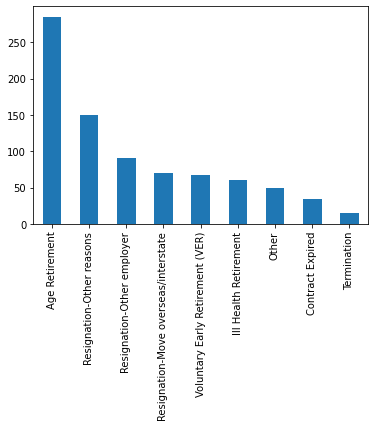

In [4]:
#we will investigate the types of separation and their frequency
separations = dete['SeparationType'].value_counts()
separations.plot.bar();

In [5]:
# Read few rows in tafe dataframe with csv reader 
tafe = pd.read_csv("http://opendata.dete.qld.gov.au/human-resources/tafe-employee-exit-survey-access-database-december-2013.csv", encoding = "cp1252")
tafe.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
#first we print the shape to understand the magnitude of null values. 
shape_tafe = tafe.shape
print(shape_tafe)
tafe.info()

(702, 72)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                        

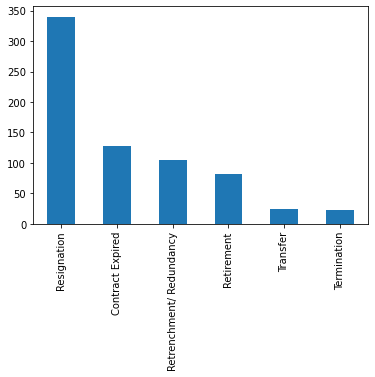

In [7]:
#we will investigate the types of separation and their frequency
separations_tafe = tafe['Reason for ceasing employment'].value_counts()
separations_tafe.plot.bar();

In [8]:
# Determine the NaN values in DETE
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In dete_survey the following columns have the most NaN values (over 600):

* Business Unit
* Aboriginal
* Torres Strait
* South Sea
* Disability
* NESB

We would need to further determine whether these columns are essential to our analysis, and decide if we can remove them or replace the null values with different data.

Now, let's examine tafe_survey null values:

In [9]:
# Determine the NaN values in TAFE
tafe.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge.     Current Age                                                  106
Employment Type.     Employment Type                                         106
Classification.     Classification                                           106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## OBSERVATIONS
In dete database there are cells with Not Stated value instead of Nan.
Both dataframes have similar columns but with different names.
There are a lot of columns that we don't need for our analysis.
There are columns with several missing numbers that we will have to remove.
The great part of the causes of ceasing is voluntary reasons.
Dete survey have more ceasing reasons.

# CLEANING DATA
### DETE SURVEY
We will start setting de 'Not Stated' values as 'NaN'.

In [10]:
# We will re read the data. 
dete = pd.read_csv("http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv", encoding = "cp1252",na_values = 'Not Stated')
dete.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


Once we have set the Nan Values, we will continue dropping the columns that we don't need for the analysis.

In [11]:
dete_clean = dete.drop(dete.columns[28:49],axis = 1)
dete_clean.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

## TAFE 
We will remove the columns that we don't need on TAFE dataset as well.

In [12]:
tafe_clean = tafe.drop(tafe.columns[17:66],axis = 1)
tafe_clean.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

# STANDARDIZE DATAFRAME

To work with both dataframes together, we need to standardize the names of the columns. Prior to that, we will update the columns of **dete dataframe.**

In [13]:
dete_clean.columns = dete_clean.columns.str.replace(" ", "_").str.lower().str.strip()
dete_clean.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Now, it's the turn of **tafe dataframe**. We will rename some columns that we will use in our analysis.

In [14]:
column_names = {'Record ID':'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
                'Gender.     What is your Gender?': 'gender','CurrentAge.     Current Age': 'age',
                'Employment Type.     Employment Type': 'employment_status','Classification.     Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_clean = tafe_clean.rename(columns = column_names)
tafe_clean.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

## Fitering the Data
Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [15]:
dete_clean['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_clean['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
# Modifying strings in column names related to `Resignation` 
dete_clean['separationtype'] = dete_clean['separationtype'].str.split("-").str.get(0)
dete_clean["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [18]:
# Creating a new DETE dataframe that consist only the data of employees who resigned
dete_resignations = dete_clean[dete_clean['separationtype'] == 'Resignation'].copy()
dete_resignations.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [19]:
# Creating a new TAFE dataframe that consist only the data of employees who resigned
tafe_resignations = tafe_clean[tafe_clean['separationtype'] == 'Resignation'].copy()
tafe_resignations.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


To select three Resignation separation types in dete_clean we had to modify their names so they will be the same. We used str.split() and str.get() functions to achieve that. After selecting the values we assigned the resulting dataframe to dete_resignations.

We didn't need to modify anything in tafe_survey_updated, so we selected the Resignation values and assigned to tafe_resignations.

## Verifying the Data
Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [20]:
dete_resignations['dete_start_date'].describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

In [21]:
# Determining the unique values in `dete_start_date` column 
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


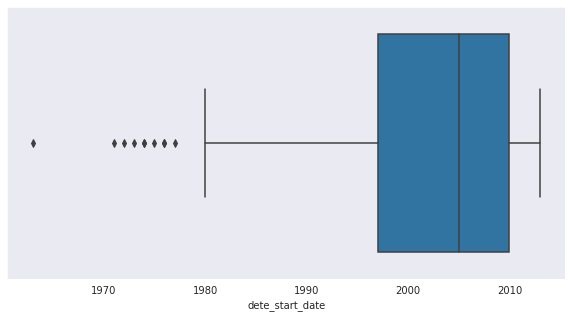

In [22]:
# Plotting the unique values of 'dete_start_date' on a boxplot 
fig = plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.despine(left=True, bottom=True)
ax1 = sns.boxplot(dete_resignations['dete_start_date']);

The boxplot above shows us that there are some outliers in the dete_start_date column concentrated in the range 1960-1980. The majority of values lie in the first quartile. No values seem to be unreasonable for the purpose of our project.

Moving on to **cease_date column** in dete_resignations:

In [23]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

As we can see our cease_date data is inconsistent, therefore we have to extract only the years using vectorized string methods.

In [24]:
# Modifying strings to extract only the year in `cease_date`
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [25]:
# Converting the values to `float` 
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

Text(0, 0.5, 'Number of resigned employees')

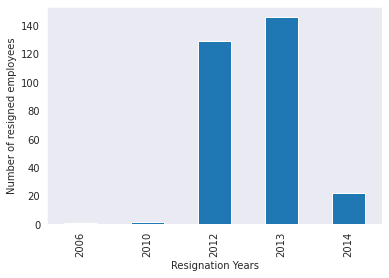

In [26]:
# Selecting the years and numbers 
dete_cease_dates = pd.DataFrame({"Years":['2006','2010','2012','2013','2014'] , "Nums":[1,2,129,146,22]})

# Plotting the results
ax2 = dete_cease_dates.plot.bar(x='Years', y='Nums', legend=False) 
ax2.set_xlabel('Resignation Years')
ax2.set_ylabel('Number of resigned employees')

We can observe that resignation of DETE ex-employees spans between 2006-2014.

In [27]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

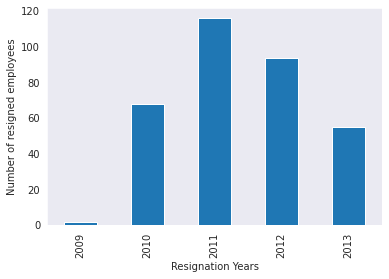

In [28]:
# Selecting the years and numbers 
tafe_cease_dates = pd.DataFrame({"Years":['2009','2010','2011','2012','2013'] , "Nums":[2,68,116,94,55]})

# Plotting the results 
ax3 = tafe_cease_dates.plot.bar(x='Years', y='Nums', legend=False) 
ax3.set_xlabel('Resignation Years')
ax3.set_ylabel('Number of resigned employees');

The bar plot for TAFE resignation years and number of employees shows us an increase in resigning employees from 2009 to 2011, and stable fall from 2011 to 2013. All values seem to be realistic, but year span is slighly different from DETE.

We will keep all years for our analysis.

## Creating a New Column
Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Since we have both start and end dates of service in DETE dataframe, we can calculate the length and create a new column in dete_resignations called institute_service.

In [29]:
# Creating new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Checking unique values 
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

This new column institute_service makes it easier to understand the span of the length of time the DETE employee spent in their workplace. Majority of the employees have worked from less than a year up to 10 years. The smaller fraction of employees have spend 20-30 years in DETE. The longest period is 49 years.

## Identifying Dissatisfied Employees
In this step, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

# **tafe_survey_updated:**
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction
# **detesurveyupdated:**
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
*  lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

These steps will help us identify dissatisfied employees in both TAFE and DETE:

1. Use Series.value_counts method to view the values in selected columns

2. Write a function that will update the values in selected columns

3. Use DataFrame.applymap() method to apply this function to all selected columns

4. Create a dissatisfied column in both dataframes using DataFrame.any() method

5. Use df.copy() method to create a copy of the results and avoid the SettingWithCopy Warning.

In [30]:
# 1. number of unique employees
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [32]:
# 2. Creating a new function named `update_vals` 
def update_vals(val): 
    if pd.isnull(val):
        return np.nan
    elif val == '-': 
        return False 
    else: 
        return True

In [44]:
# Applying `update_vals` function to selected columns in TAFE dataframe 
cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

# Passing a fucntion to all values and creating a new column
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_vals).any(axis=1, skipna=False)

# Creating a copy of the result
tafe_resignations_up = tafe_resignations.copy()

In [45]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [46]:
# Applying `update_vals` function to selected columns in DETE dataframe 

cols = ['job_dissatisfaction',
        'dissatisfaction_with_the_department',
        'physical_work_environment',
        'lack_of_recognition',
        'lack_of_job_security',
        'work_location',
        'employment_conditions',
        'work_life_balance',
        'workload']

# Passing a fucntion to all values and creating a new column
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
 
# Creating a copy of the result
dete_resignations_up = dete_resignations.copy()

In [47]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data
First, let's add a column to each dataframe that will allow us to easily distinguish between the two:

In [48]:
# Creating new Columns
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

## Combining the dataframes:

We will combine the dataframes with pd.concat() function because our end goal is to aggregate the data according to the institute_service column. We will use inner join, and axis=0 to make it easier for us to aggregate the data.

In [51]:
# Combining the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, join='inner')
combined.head()

,id,separationtype,cease_date,institute_service,dissatisfied,institute
0,4,Resignation,2012.0,7,False,DETE
1,6,Resignation,2012.0,18,True,DETE
2,9,Resignation,2012.0,3,False,DETE
3,10,Resignation,2012.0,15,True,DETE
4,12,Resignation,2012.0,3,False,DETE


## Cleaning the Service Column
This column is tricky to clean because it currently contains values in a couple different forms:

In [50]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data, we'll convert these numbers into categories:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [53]:
# extract service years and convert to float
combined["institute_service_updated"] = combined["institute_service"].astype('str').str.extract(r'(\d+)', expand=False)
combined["institute_service_updated"] = combined["institute_service_updated"].astype('float')

#verify the changes and unique values
combined["institute_service_updated"].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_updated, dtype: int64

Next, we'll map each value to one of the career stage definitions above.

In [54]:
# Create a function that maps each year value to one of the career stages 
def career_stage(val):
    if pd.isnull(val): 
        return np.nan
    elif val < 3:
        return 'New'
    elif val <= 6: 
        return 'Experienced'
    elif val <= 10: 
        return 'Established'
    else: 
        return 'Veteran'
    
# Applying the function and creating a new column 
combined['service_cat'] = combined['institute_service_updated'].apply(career_stage)

In [55]:
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

After categorizing the values in the institute_service column into career stages, we know exactly the number of employees who worked for the institutes for a short period of time and those who worked there longer, which would help us answer the question of our analysis and determine if they resigned due to some kind of dissatisfaction.

# Performing Initial analysis

In [56]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [57]:
# Filling in the missing values with the most common value 'False'
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [58]:
combined['dissatisfied'].value_counts(dropna= False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [59]:
# Creating a pivot table to display dissatisfied employees by service_category
pv_service_cat_dissatisfied = combined.pivot_table(values='dissatisfied', index='service_cat')
pv_service_cat_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


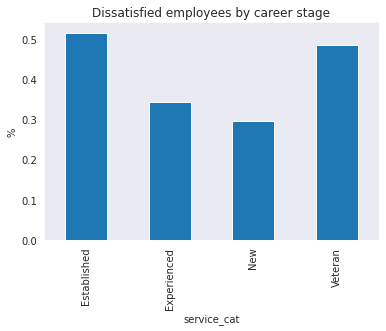

In [60]:
# Plotting the pivot table on a bar plot
ax4 = pv_service_cat_dissatisfied.plot(kind='bar', legend=False)
ax4.set_title('Dissatisfied employees by career stage')
ax4.set_ylabel('%');

Looking at this bar chart, we can make the following observations:

Majority of employees who worked in the institutions for short period of time resigned for reasons other than job dissatisfaction. Only 29.5% quit because they were not satisfied.

Approximately 50% of ex-employees belonging to Established and Veteran categories who worked for the institutions the longest quit because they were not satisfied with their job.

We can also figure out which job positions under those service categories were dissatisfied the most and the least:

In [61]:
# Identifying the unique values in `position` column
dete_resignations["position"].value_counts()

Teacher                                                    129
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
School Based Professional Staff (Therapist, nurse, etc)      5
Other                                                        3
Guidance Officer                                             3
Professional Officer                                         2
Business Service Manager                                     1
Name: position, dtype: int64

In [62]:
# Generating pivot table to represent dissatisfied employees by position held
pv_position_dissatisfied = dete_resignations.pivot_table(values='dissatisfied', index='position')
pv_position_dissatisfied = pv_position_dissatisfied.reindex(pv_position_dissatisfied['dissatisfied'].sort_values(ascending=False).index)
pv_position_dissatisfied

,dissatisfied
position,
Guidance Officer,1.000000
Other,0.666667
Public Servant,0.600000
Teacher,0.527132
Head of Curriculum/Head of Special Education,0.500000
Cleaner,0.487179
Schools Officer,0.428571
School Administrative Staff,0.375000
Teacher Aide,0.365079


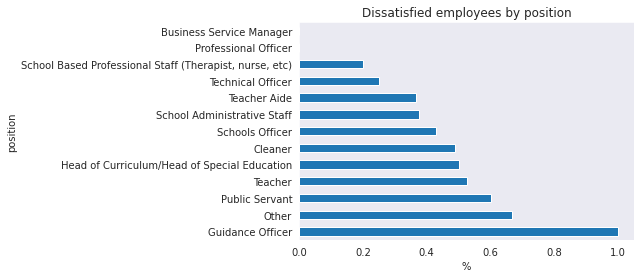

In [63]:
# Plotting the results on a horizontal bar plot
ax5 = pv_position_dissatisfied.plot(kind='barh', legend=False)
ax5.set_title('Dissatisfied employees by position')
ax5.set_xlabel('%');

Employees who held the Guidance Officer position resigned because they were all dissatified with their job, whereas employees with Workplace Training Officer, Business Service Manager, Professional Officer and Tutor positions were completely satisfied.

## Further Analysis
### Cleaning the Age Column
First step is to clean the age column and standardize the format.



In [64]:
# Identifying the unique `age` values
dete_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            42
51-55            32
56-60            26
61 or older      23
NaN               5
Name: age, dtype: int64

Now that we know all unique values, we can modify the values by changing the astype to str and use vectorized operations to change the strings.

After, we will divide the ages into the following age groups:

* 20s [20 or younger-25]
* 30s [26-35]
* 40s [36-45]
* 50s [46-55]
* 60s [56 or older]

To accomplish that, we will write a function age_group, and pass this function to the entire age column using apply() method.

We will split all strings and keep only the first number since the range of values fall into the same age category. For example, the values in range 21-25 fall into 20s category, the values in range 51-55 fall into 50s category and so on.

In [65]:
# Formatting object type to a str and using vectorized operations 
dete_resignations['age'] = dete_resignations['age'].astype(str).str.split('or').str.get(0).str.split('-').str.get(0).str.split(' ').str.get(0)

# Changing object type back to float
dete_resignations['age'] = dete_resignations['age'].astype(float)

dete_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20.0     1
21.0    29
26.0    35
31.0    29
36.0    41
41.0    48
46.0    42
51.0    32
56.0    26
61.0    23
NaN      5
Name: age, dtype: int64

In [66]:
# Creating a new function to group `age` column
def age_group(val): 
    if pd.isnull(val):
        return np.nan
    elif val <= 25: 
        return '20s'
    elif val <= 35:
        return '30s'
    elif val <= 45:
        return '40s'
    elif val <= 55: 
        return '50s'
    elif val <= 65: 
        return '60s'

In [67]:
# Creating a new column and passing a function to all values in `age_groups`
combined['age_groups'] = dete_resignations['age'].apply(age_group)
combined['age_groups'].value_counts(dropna=False)

NaN    413
40s     67
30s     55
50s     55
60s     39
20s     22
Name: age_groups, dtype: int64

In [68]:
# Filling in the missing values with the most common value
combined['age_groups'] = combined['age_groups'].fillna('40s')
combined['age_groups'].value_counts(dropna=False)

40s    480
30s     55
50s     55
60s     39
20s     22
Name: age_groups, dtype: int64

## Dissatisfaction by Age
Now that we know how many people are in each age group, we will create a pivot table, where values - dissatisfied column, and index - age_groups column. Then, we will plot the pivot table.

In [69]:
# Generating a PV to represent dissatisfied employees by age 
pv_age_dissatisfied = combined.pivot_table(values='dissatisfied', index='age_groups')
pv_age_dissatisfied

,dissatisfied
age_groups,
20s,0.363636
30s,0.236364
40s,0.381250
50s,0.418182
60s,0.333333


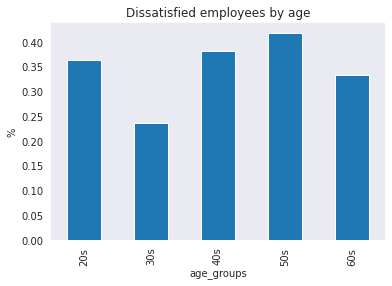

In [70]:
# Plotting the PV
ax5 = pv_age_dissatisfied.plot(kind='bar', legend=False)
ax5.set_title('Dissatisfied employees by age')
ax5.set_ylabel('%');

Looking at this bar chart, we can see that only about 29% of younger employees who were in their 20s resinged due to some kind of dissatisfaction. Whereas the number of people in their 30s, 50s, and 60s who were dissatisfied with their job is somewhat similar and account for 40%, 40%, and 42% respectively.

## TAFE & DETE separate analyses
* First step is to extract dissatisfied employees in each of the institutes.
* Then, create a pivot table representing dissatisfied employees in both DETE and TAFE.
* Last step, to plot the results.

In [71]:
# Separating the DETE from `combined`
dete_only = combined[combined['institute'] == "DETE"]

# Checking the unique values in a `dissatisfied` column
dete_only['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [72]:
# Separating the TAFE from `combined`
tafe_only = combined[combined['institute'] == "TAFE"] 

# Checking the unique values in a `dissatisfied` column
tafe_only['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [73]:
# Creating a PV for dissatisfied employees from both institutes
pv_tafe_dete = combined.pivot_table(values='dissatisfied', index='institute')
pv_tafe_dete

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


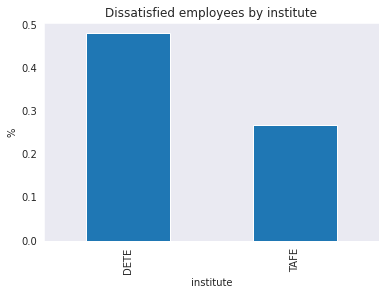

In [74]:
# Plotting the PV 
ax6 = pv_tafe_dete.plot(kind='bar', legend=False)
ax6.set_title('Dissatisfied employees by institute')
ax6.set_ylabel('%');

As we can see there were more employees in DETE(47.9%) who were dissatisfied with their job than in TAFE(26.7%).

# Conclusion
After cleaning the datasets, identifying the missing values, combining the datasets, and performing the initial analysis, we can finally summarize that approximately half of the ex-employees who worked for a long period of time in both DETE and TAFE resigned due to some kind of dissatisfaction. Whereas, the number of employees who worked for a short period of time is lower and accounts for 29.5%.

The number of younger employees(29%) resinging due to dissatisfaction is lower than that of older employees (40%-42%).